<a href="https://colab.research.google.com/github/Aditya2363/Movie-Recommendation-Sys/blob/main/recommandation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/dataset/Data Science Projects/RECOMMENDATION system/dataset.csv')

In [ ]:
dataset.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [ ]:
dataset.shape

(10000, 9)

In [ ]:
dataset.columns

Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
import pandas as pd

# Assuming your dataset is loaded into a DataFrame called 'dataset'

# Display basic information
dataset.info()

# Display summary statistics for numerical columns
dataset.describe()

# Check for missing values
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
 9   tags               9985 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 781.4+ KB


,0
id,0
title,0
genre,3
original_language,0
overview,13
popularity,0
release_date,0
vote_average,0
vote_count,0
tags,15


In [ ]:
dataset['tags'] = dataset['genre'] + dataset['overview']

In [ ]:
dataset.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count,tags
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862,"Drama,CrimeFramed in the 1940s for the double ..."
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731,"Comedy,Drama,RomanceRaj is a rich, carefree, h..."
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280,"Drama,CrimeSpanning the years 1945 to 1955, a ..."
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959,"Drama,History,WarThe true story of how busines..."
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811,"Drama,CrimeIn the continuing saga of the Corle..."


In [ ]:
new_df = dataset[['id', 'title', 'genre', 'overview', 'tags']]

In [ ]:
new_df = new_df.drop(columns = ['genre', 'overview'])

In [ ]:
new_df.head()

,id,title,tags
0,278,The Shawshank Redemption,"Drama,CrimeFramed in the 1940s for the double ..."
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,RomanceRaj is a rich, carefree, h..."
2,238,The Godfather,"Drama,CrimeSpanning the years 1945 to 1955, a ..."
3,424,Schindler's List,"Drama,History,WarThe true story of how busines..."
4,240,The Godfather: Part II,"Drama,CrimeIn the continuing saga of the Corle..."


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer

dataset = pd.read_csv('/content/drive/MyDrive/dataset/Data Science Projects/RECOMMENDATION system/dataset.csv')
dataset['tags'] = dataset['genre'] + dataset['overview']
new_df = dataset[['id', 'title', 'genre', 'overview', 'tags']]
new_df = new_df.drop(columns=['genre', 'overview'])

new_df['tags'] = new_df['tags'].fillna('')

vectorizer = TfidfVectorizer(stop_words='english') # Initialize TfidfVectorizer
tfidf_matrix = vectorizer.fit_transform(new_df['tags']) # Fit and transform the 'tags' column

print(tfidf_matrix)

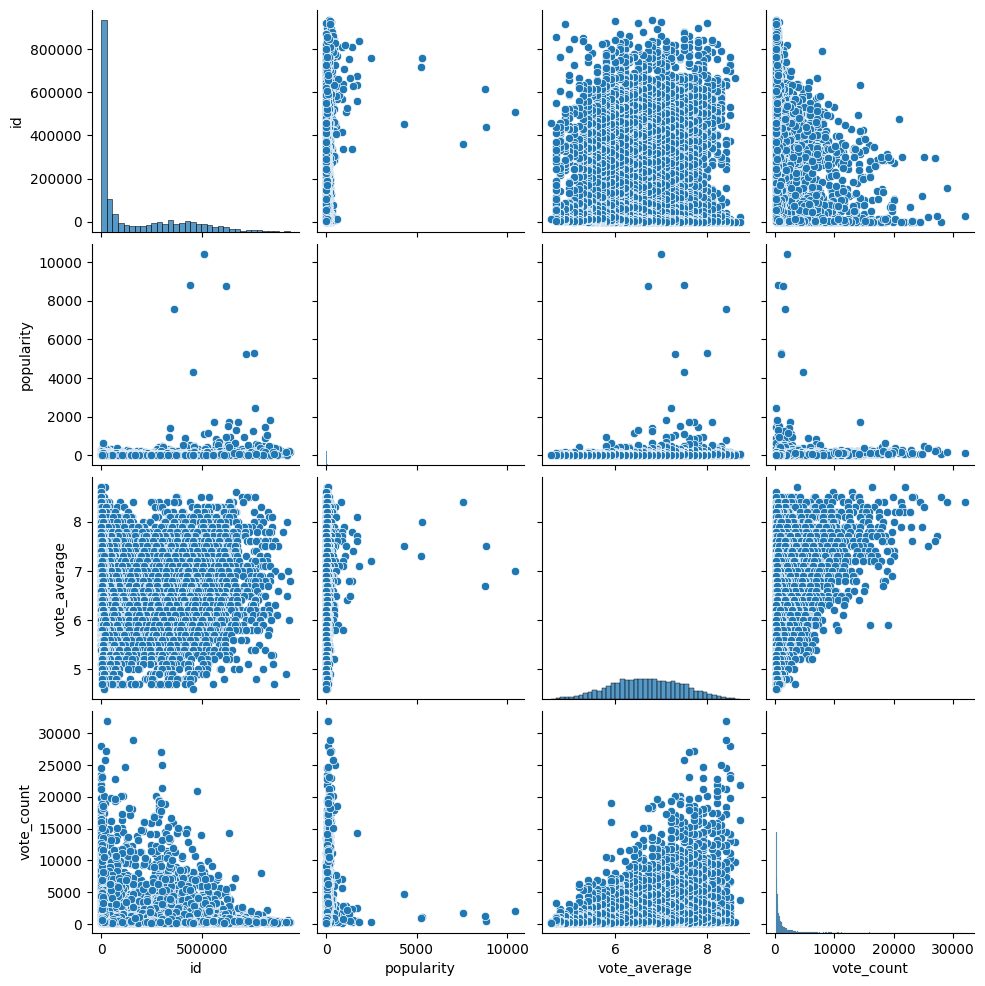

In [ ]:
import seaborn as sns
import pandas as pd

# Load your dataset using pd.read_csv
data = pd.read_csv('/content/drive/MyDrive/dataset/Data Science Projects/RECOMMENDATION system/dataset.csv')

# Create a pair plot
sns.pairplot(data)

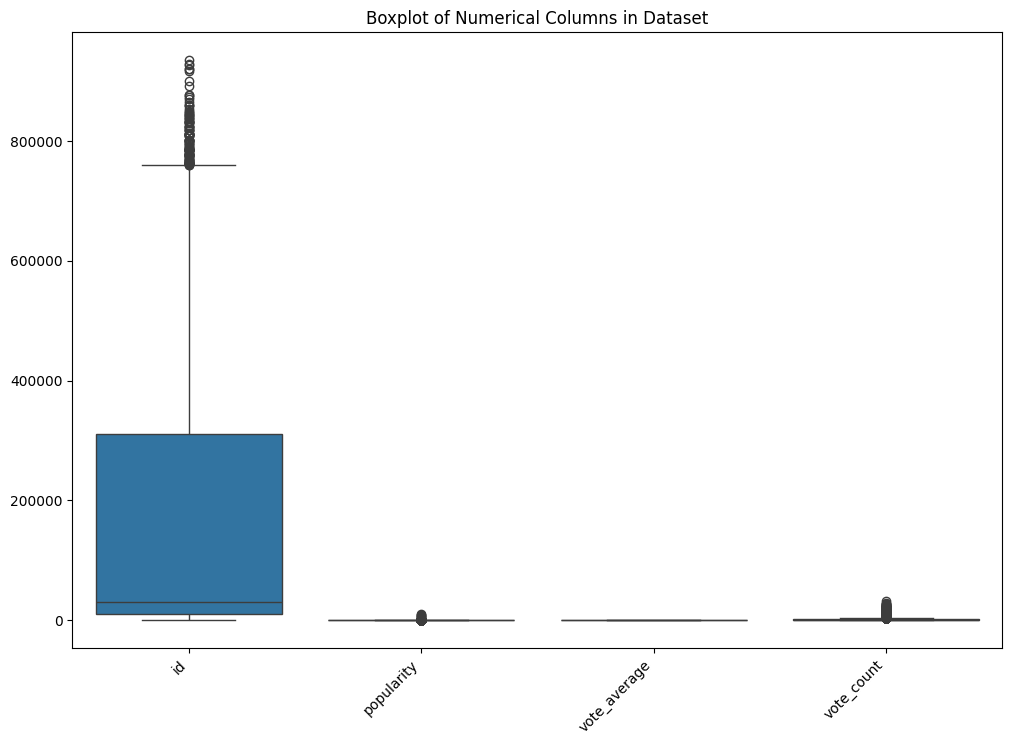

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming 'dataset' is your DataFrame
# Get numerical columns
numerical_cols = dataset.select_dtypes(include=['number']).columns

# Create boxplot
plt.figure(figsize=(12, 8))  # Adjust figsize for better visibility if needed
sns.boxplot(data=dataset[numerical_cols])  # Use dataset with selected columns
plt.title('Boxplot of Numerical Columns in Dataset')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

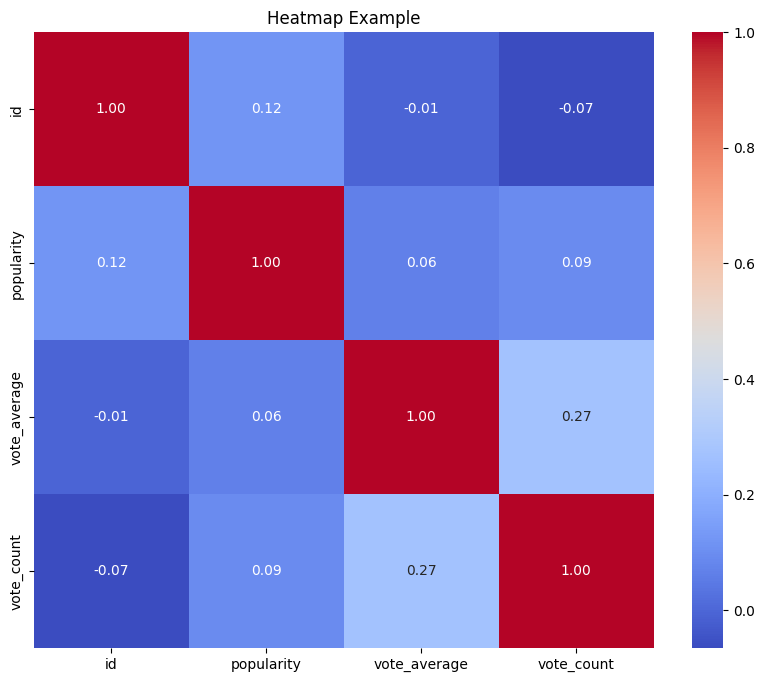

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your original dataset is named 'dataset'
# and you want to include all numerical columns for correlation

# Get a list of numerical columns
numerical_cols = dataset.select_dtypes(include=['number']).columns # This line is added to define 'numerical_cols'

# Calculate correlation matrix using the original dataset and selected columns
correlation_matrix = dataset[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Example')
plt.show()

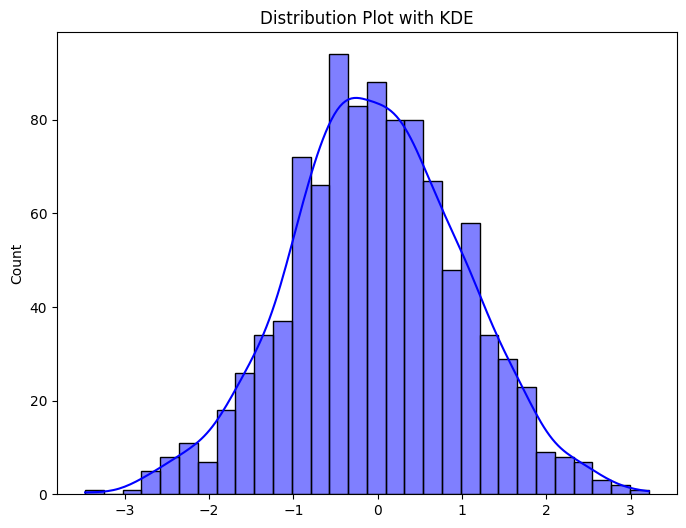

In [ ]:
data = np.random.normal(size=1000)

# Create distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(data, kde=True, color='blue', bins=30)
plt.title('Distribution Plot with KDE')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(max_features = 10000, stop_words = 'english')

In [ ]:
cv

CountVectorizer(max_features=10000, stop_words='english')

In [ ]:
vec = cv.fit_transform(new_df['tags'].values.astype('U')).toarray()

In [ ]:
vec

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
vec.shape

(10000, 10000)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(vec)

In [ ]:
sim

array([[1.        , 0.06253054, 0.05802589, ..., 0.07963978, 0.07597372,
        0.03798686],
       [0.06253054, 1.        , 0.08980265, ..., 0.        , 0.        ,
        0.        ],
       [0.05802589, 0.08980265, 1.        , ..., 0.02541643, 0.03636965,
        0.        ],
       ...,
       [0.07963978, 0.        , 0.02541643, ..., 1.        , 0.03327792,
        0.03327792],
       [0.07597372, 0.        , 0.03636965, ..., 0.03327792, 1.        ,
        0.04761905],
       [0.03798686, 0.        , 0.        , ..., 0.03327792, 0.04761905,
        1.        ]])

In [ ]:
new_df[new_df['title'] == 'The Shawshank Redemption']

,id,title,tags
0,278,The Shawshank Redemption,"Drama,CrimeFramed in the 1940s for the double ..."


In [ ]:
dist = sorted(list(enumerate(sim[0])), reverse = True, key = lambda vec : vec[1])

In [ ]:
dist

[(0, np.float64(1.0000000000000002)),
 (3709, np.float64(0.23539595453459988)),
 (3649, np.float64(0.22019275302527214)),
 (9006, np.float64(0.20751433915982243)),
 (2605, np.float64(0.20100756305184245)),
 (4068, np.float64(0.20100756305184245)),
 (6156, np.float64(0.20100756305184245)),
 (698, np.float64(0.19894589252079753)),
 (7324, np.float64(0.19767387315371682)),
 (1009, np.float64(0.19069251784911848)),
 (884, np.float64(0.1899342940993966)),
 (2963, np.float64(0.18802535827258876)),
 (7478, np.float64(0.1877810107252081)),
 (2991, np.float64(0.1860968420796942)),
 (715, np.float64(0.18582615562066462)),
 (7271, np.float64(0.18556740475630137)),
 (9520, np.float64(0.18148850216015694)),
 (2120, np.float64(0.17978662999019787)),
 (4201, np.float64(0.17912443020795962)),
 (9718, np.float64(0.17766726362967541)),
 (2796, np.float64(0.17407765595569785)),
 (4063, np.float64(0.17407765595569785)),
 (4295, np.float64(0.17407765595569785)),
 (4491, np.float64(0.17407765595569785)),
 (

In [ ]:
for i in dist[0 : 5]:
  print(new_df.iloc[i[0]].title)

The Shawshank Redemption
Anything for Her
The Woodsman
The Getaway
Pusher II


In [ ]:
def recommand(dataset):
  index = new_df[new_df['title'] == dataset].index[0]
  distance = sorted(list(enumerate(sim[index])), reverse = True, key = lambda vec : vec[1])
  for i in distance[0 : 5]:
    print(new_df.iloc[i[0]].title)

In [ ]:
recommand("Titanic")

Titanic
The Legend of 1900
Nowhere Boy
Standing Tall
The Boxer
